Import libraries

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
%pwd

'c:\\Users\\pouru\\All_about_pandas\\Machine_learning_project\\Resolute_AI_internship-\\experiment'

In [3]:
import os 
os.chdir("../")

Get the data


In [33]:
df = pd.read_excel("Data/Task1and2/train.xlsx")

In [5]:
df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [25]:
df['target'].value_counts()

target
A39    635
A33    633
A29    432
A3     429
B45    428
      ... 
A27    191
B65    191
A69    190
A18    189
A9     188
Name: count, Length: 160, dtype: int64

## Standardize the Variables

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop('target',axis=1))

StandardScaler()

In [8]:
scaled_features = scaler.transform(df.drop('target',axis=1))

In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-0.473214,0.395082,-0.174817,1.510124,1.668531,0.036842,-1.617062,0.944017,-0.972582,-1.195697,-0.033645,0.027544,0.358926,0.564597,-0.917757,-1.030627,0.288997,-0.981958
1,-1.274389,-1.063227,-0.787982,-1.314495,-0.066662,0.036842,0.111284,1.436140,1.008905,-0.907457,-0.668309,-0.987557,-1.216048,0.355452,0.059737,0.107850,1.281864,0.338691
2,1.472497,2.975166,1.174147,-0.086400,0.305165,0.152430,0.219306,-0.335504,0.348409,1.302380,1.024127,1.493800,-0.246833,-0.376559,-0.809147,0.392469,-0.207437,-0.981958
3,-0.702121,0.282904,0.683615,0.036410,-0.066662,-0.194335,-1.184976,-1.516600,-1.633077,0.629821,-1.937636,0.704277,-0.004529,-1.945152,-0.483315,-0.746008,-2.888180,-0.604629
4,-0.129853,-0.502339,-0.052184,0.282029,0.676992,1.192726,-0.320802,-0.532353,-0.500799,0.533741,0.495241,1.042644,1.206989,-1.213142,0.385568,-0.176769,-0.505298,-1.264954


Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['target'],
                                                    test_size=0.30)

## Using KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
pred = knn.predict(X_test)

## Predictions and Evaluations

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [17]:
print(confusion_matrix(y_test,pred))

[[69  0  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  0]
 [ 0  0 55 ...  0  0  0]
 ...
 [ 0  0  0 ... 70  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  0  0 ...  0  0 56]]


## Choosing a K Value

c:\Users\pouru\anaconda3\envs\ml_project\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pouru\anaconda3\envs\ml_project\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pouru\anaconda3\envs\ml_project\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pouru\anaconda3\envs\ml_project\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of

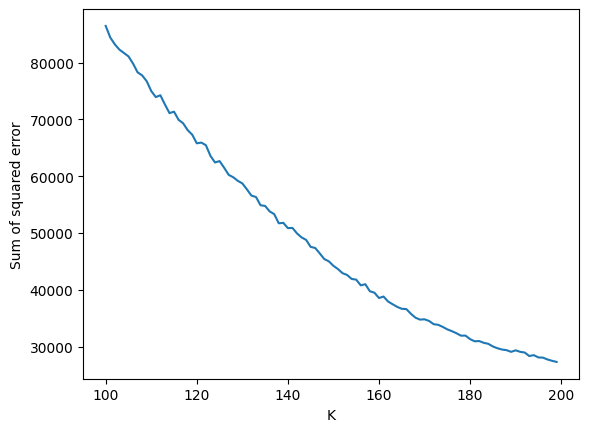

In [21]:
sse = []
k_rng = range(100,200)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_feat[['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16','T17','T18']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

As you can see that squared error is significantly decreasing in this plot so, 
lets consider n_neighbors = 160

In [26]:
model = KNeighborsClassifier(n_neighbors=160)  
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=160)

In [27]:
y_pred = model.predict(X_test)

Consider macro averaging for multiclass

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro') 
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

Required result

In [32]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9450389987302739
Precision: 0.9507903578600596
Recall: 0.9526091119579011
F1-score: 0.9490048089933751
